[Notebooks with Kqlmagic (Kusto Query Language) in Azure Data Studio - Azure Data Studio | Microsoft Docs](https://docs.microsoft.com/en-us/sql/azure-data-studio/notebooks/notebooks-kqlmagic?view=sql-server-ver15)

In [1]:
import sys
!{sys.executable} -m pip install Kqlmagic --no-cache-dir --upgrade

You should consider upgrading via the 'C:\Users\hiramfleitas\azuredatastudio-python\python.exe -m pip install --upgrade pip' command.



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

In [3]:
import sys
!{sys.executable} -m pip list 

Package                Version
---------------------- --------------
adal                   1.2.7
argon2-cffi            21.1.0
attrs                  21.2.0
autovizwidget          0.19.1
azure-common           1.1.27
azure-core             1.21.1
azure-identity         1.7.1
azure-keyvault-secrets 4.3.0
backcall               0.2.0
beautifulsoup4         4.10.0
bleach                 4.1.0
certifi                2021.5.30
cffi                   1.14.6

You should consider upgrading via the 'C:\Users\hiramfleitas\azuredatastudio-python\python.exe -m pip install --upgrade pip' command.



charset-normalizer     2.0.4
click                  8.0.3
colorama               0.4.4
cryptography           36.0.1
cycler                 0.11.0
debugpy                1.4.3
decorator              5.1.0
defusedxml             0.7.1
entrypoints            0.3
Flask                  2.0.2
fonttools              4.29.1
hdijupyterutils        0.19.1
idna                   3.2
importlib-metadata     4.10.1
ipykernel              5.5.5
ipython                7.27.0
ipython-genutils       0.2.0
ipywidgets             7.6.4
isodate                0.6.1
itsdangerous           2.0.1
jedi                   0.18.0
Jinja2                 3.0.1
jsonschema             3.2.0
jupyter                1.0.0
jupyter-client         7.0.2
jupyter-console        6.4.0
jupyter-core           4.7.1
jupyterlab-pygments    0.1.2
jupyterlab-widgets     1.0.1
kiwisolver             1.3.2
Kqlmagic               0.1.114.post16
lxml                   4.7.1
Markdown               3.3.6
MarkupSafe             2.0.1
m


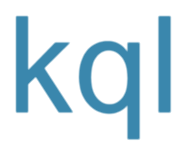

In [4]:
%reload_ext Kqlmagic

In [5]:
%kql --help "help"

Overview
Help command is a tool to get more information on a topics that are relevant to Kqlmagic.help
usage: %kql --help "topic"
Topics


usage - How to use Kqlmagic.



config - Lists Kqlmagic default options. The same as --config without parameters.



faq - Reference to Kqlmagic FAQ



conn - Lists the available connection string variation, and how their are used to authenticatie to data sources.



query / kql - Reference to resources Kusto Query language, aka kql, documentation



options - Lists the available options, and their behavior impact on the submit query command.



env - Lists all KQLMAGIC environment variables and their purpose.



commands - Lists the available commands, and what they do.



proxies - How to use Kqlmagic via proxies.



sql - Azure Data Explorer SQL support.



aria - How to query Aria's Azure Data Explorer databases.



client-request-properties - How to use Client Request properties, and properties list.



request-tags - How to tag request headers.



AzureMonitor- Reference to resources Azure Monitor tools
Azure Monitor, which now includes Log Analytics and Application Insights, provides sophisticated tools for collecting and analyzing telemetry that allow you to maximize the performance and availability of your cloud and on-premises resources and applications. It helps you understand how your applications are performing and proactively identifies issues affecting them and the resources they depend on.



AzureDataExplorer / kusto- Reference to resources Azure Data Explorer (kusto) service
Azure Data Explorer is a fast and highly scalable data exploration service for log and telemetry data. It helps you handle the many data streams emitted by modern software, so you can collect, store, and analyze data. Azure Data Explorer is ideal for analyzing large volumes of diverse data from any data source, such as websites, applications, IoT devices, and more.



LogAnalytics- Reference to resources Log Analytics service
Log data collected by Azure Monitor is stored in Log Analytics which collects telemetry and other data from a variety of sources and provides a query language for advanced analytics.



ApplicationInsights / AppInsights- Reference to resources Application Insights service
Application Insights is an extensible Application Performance Management (APM) service for web developers on multiple platforms. Use it to monitor your live web application. It will automatically detect performance anomalies. It includes powerful analytics tools to help you diagnose issues and to understand what users actually do with your app. It's designed to help you continuously improve performance and usability. It works for apps on a wide variety of platforms including .NET, Node.js and J2EE, hosted on-premises or in the cloud. It integrates with your DevOps process, and has connection points to a variety of development tools. It can monitor and analyze telemetry from mobile apps by integrating with Visual Studio App Center.



kqlmagic-readme - Reference to Kqlmagic readme



kqlmagic-github - Reference to Kqlmagic github



kqlmagic-license - Reference to Kqlmagic license



kqlmagic-contributors - Reference to Kqlmagic contributors



kqlmagic-install - Reference to Kqlmagic pypi install readme



kqlmagic-downloads - Reference to Kqlmagic downloads data



logging - How to enable logging.



help - This help.



Need Support?

Have a feature request for Kqlmagic? Please post it on User Voice to help us prioritize
Have a technical question? Ask on Stack Overflow with tag "Kqlmagic"
Need Support? Every customer with an active Azure subscription has access to support with guaranteed response time.  Consider submitting a ticket and get assistance from Microsoft support team
Found a bug? Please help us fix it by thoroughly documenting it and filing an issue.

In [6]:
%kql --version

Kqlmagic version: 0.1.114.post16

In [7]:
%kql azureDataExplorer://code;cluster='help';database='Samples'

In [11]:
%kql StormEvents | summarize count() by State | sort by count_ | limit 10 

State,count_
TEXAS,4701
KANSAS,3166
IOWA,2337
ILLINOIS,2022
MISSOURI,2016
GEORGIA,1983
MINNESOTA,1881
WISCONSIN,1850
NEBRASKA,1766
NEW YORK,1750


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

In [10]:
%kql StormEvents \
| summarize event_count=count() by bin(StartTime, 1d) \
| render timechart title= 'Daily Storm Events'

[{'StartTime': datetime.datetime(2007, 9, 29, 0, 0, tzinfo=tzutc()), 'event_count': 84},
 {'StartTime': datetime.datetime(2007, 9, 18, 0, 0, tzinfo=tzutc()), 'event_count': 101},
 {'StartTime': datetime.datetime(2007, 9, 20, 0, 0, tzinfo=tzutc()), 'event_count': 148},
 {'StartTime': datetime.datetime(2007, 12, 30, 0, 0, tzinfo=tzutc()), 'event_count': 77},
 {'StartTime': datetime.datetime(2007, 12, 20, 0, 0, tzinfo=tzutc()), 'event_count': 107},
 {'StartTime': datetime.datetime(2007, 12, 28, 0, 0, tzinfo=tzutc()), 'event_count': 131},
 {'StartTime': datetime.datetime(2007, 12, 7, 0, 0, tzinfo=tzutc()), 'event_count': 119},
 {'StartTime': datetime.datetime(2007, 12, 13, 0, 0, tzinfo=tzutc()), 'event_count': 202},
 {'StartTime': datetime.datetime(2007, 12, 23, 0, 0, tzinfo=tzutc()), 'event_count': 273},
 {'StartTime': datetime.datetime(2007, 12, 11, 0, 0, tzinfo=tzutc()), 'event_count': 196},
 {'StartTime': datetime.datetime(2007, 12, 10, 0, 0, tzinfo=tzutc()), 'event_count': 254},
 {'StartTime': datetime.datetime(2007, 12, 15, 0, 0, tzinfo=tzutc()), 'event_count': 405},
 {'StartTime': datetime.datetime(2007, 12, 16, 0, 0, tzinfo=tzutc()), 'event_count': 288},
 {'StartTime': datetime.datetime(2007, 12, 1, 0, 0, tzinfo=tzutc()), 'event_count': 948},
 {'StartTime': datetime.datetime(2007, 12, 9, 0, 0, tzinfo=tzutc()), 'event_count': 188},
 {'StartTime': datetime.datetime(2007, 12, 14, 0, 0, tzinfo=tzutc()), 'event_count': 111},
 {'StartTime': datetime.datetime(2007, 12, 8, 0, 0, tzinfo=tzutc()), 'event_count': 133},
 {'StartTime': datetime.datetime(2007, 12, 27, 0, 0, tzinfo=tzutc()), 'event_count': 99},
 {'StartTime': datetime.datetime(2007, 11, 4, 0, 0, tzinfo=tzutc()), 'event_count': 38},
 {'StartTime': datetime.datetime(2007, 8, 24, 0, 0, tzinfo=tzutc()), 'event_count': 402},
 {'StartTime': datetime.datetime(2007, 8, 3, 0, 0, tzinfo=tzutc()), 'event_count': 371},
 {'StartTime': datetime.datetime(2007, 8, 20, 0, 0, tzinfo=tzutc()), 'event_count': 319},
 {'StartTime': datetime.datetime(2007, 1, 15, 0, 0, tzinfo=tzutc()), 'event_count': 194},
 {'StartTime': datetime.datetime(2007, 11, 5, 0, 0, tzinfo=tzutc()), 'event_count': 73},
 {'StartTime': datetime.datetime(2007, 11, 21, 0, 0, tzinfo=tzutc()), 'event_count': 106},
 {'StartTime': datetime.datetime(2007, 8, 16, 0, 0, tzinfo=tzutc()), 'event_count': 431},
 {'StartTime': datetime.datetime(2007, 8, 25, 0, 0, tzinfo=tzutc()), 'event_count': 397},
 {'StartTime': datetime.datetime(2007, 8, 9, 0, 0, tzinfo=tzutc()), 'event_count': 291},
 {'StartTime': datetime.datetime(2007, 12, 21, 0, 0, tzinfo=tzutc()), 'event_count': 136},
 {'StartTime': datetime.datetime(2007, 8, 6, 0, 0, tzinfo=tzutc()), 'event_count': 209},
 {'StartTime': datetime.datetime(2007, 8, 30, 0, 0, tzinfo=tzutc()), 'event_count': 117},
 {'StartTime': datetime.datetime(2007, 8, 17, 0, 0, tzinfo=tzutc()), 'event_count': 376},
 {'StartTime': datetime.datetime(2007, 8, 4, 0, 0, tzinfo=tzutc()), 'event_count': 70},
 {'StartTime': datetime.datetime(2007, 8, 7, 0, 0, tzinfo=tzutc()), 'event_count': 266},
 {'StartTime': datetime.datetime(2007, 12, 26, 0, 0, tzinfo=tzutc()), 'event_count': 61},
 {'StartTime': datetime.datetime(2007, 11, 14, 0, 0, tzinfo=tzutc()), 'event_count': 91},
 {'StartTime': datetime.datetime(2007, 12, 31, 0, 0, tzinfo=tzutc()), 'event_count': 105},
 {'StartTime': datetime.datetime(2007, 12, 17, 0, 0, tzinfo=tzutc()), 'event_count': 28},
 {'StartTime': datetime.datetime(2007, 8, 19, 0, 0, tzinfo=tzutc()), 'event_count': 211},
 {'StartTime': datetime.datetime(2007, 8, 21, 0, 0, tzinfo=tzutc()), 'event_count': 349},
 {'StartTime': datetime.datetime(2007, 8, 13, 0, 0, tzinfo=tzutc()), 'event_count': 249},
 {'StartTime': datetime.datetime(2007, 2, 24, 0, 0, tzinfo=tzutc()), 'event_count': 1014},
 {'StartTime': datetime.datetime(2007, 11, 28, 0, 0, tzinfo=tzutc()), 'event_count': 30},
 {'StartTime': datetime.datetime(2007, 8, 14, 0, 0, tzinfo=tzutc()), 'event_count': 106},
 {'StartTime': datetime.datetime(200

In [12]:
%%kql
StormEvents
| summarize count() by State
| sort by count_
| limit 10
| render columnchart title='Top 10 States by Storm Event count'

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]